In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn import linear_model
import math

In [2]:
#load the dataset
data = np.loadtxt('ex2data2.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]
print("X: " + str(X.shape))
print("y: " + str(y.shape))

X: (118, 2)
y: (118,)


In [3]:
def map_feature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

it = map_feature(X[:, 0], X[:, 1])
print("it: " + str(it))

it: [[  1.00000000e+00   5.12670000e-02   6.99560000e-01 ...,   6.29470940e-04
    8.58939846e-03   1.17205992e-01]
 [  1.00000000e+00  -9.27420000e-02   6.84940000e-01 ...,   1.89305413e-03
   -1.39810280e-02   1.03255971e-01]
 [  1.00000000e+00  -2.13710000e-01   6.92250000e-01 ...,   1.04882142e-02
   -3.39734512e-02   1.10046893e-01]
 ..., 
 [  1.00000000e+00  -4.84450000e-01   9.99270000e-01 ...,   2.34007252e-01
   -4.82684337e-01   9.95627986e-01]
 [  1.00000000e+00  -6.33640000e-03   9.99270000e-01 ...,   4.00328554e-05
   -6.31330588e-03   9.95627986e-01]
 [  1.00000000e+00   6.32650000e-01  -3.06120000e-02 ...,   3.51474517e-07
   -1.70067777e-08   8.22905998e-10]]


In [4]:
def logit(z):
    return 1/(1 + math.exp(-z))

def cost(h, y):
    return (y-1) * math.log(1-h) - y * math.log(h)

def J(theta, X, y):
    return J_array(X.dot(theta), y)

def J_array(XTTheta, y):
    J = 0
    for i in range(XTTheta.size):
        J += cost(logit(XTTheta[i]), y[i])
    return J/y.size

def J_grad(X, loss):
    return np.dot(X.T, loss) / X.shape[1]

In [5]:
def gradientDescent(x, y, theta, alpha, numIterations):
    xTrans = x.transpose()
    arrayJ = np.zeros(numIterations)
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y

        cost = J_array(hypothesis, y)
        arrayJ[i] = cost
        print("Iteration %d | Cost: %f" % (i, cost))

        gradient = J_grad(x, loss)
        theta = theta - alpha * gradient
    return theta, arrayJ

In [6]:
theta, arrayJ = gradientDescent(it, y, np.zeros(it.shape[1]), 0.3, 1000)
print("J: " + str(J(theta, it, y)))

Iteration 0 | Cost: 0.693147
Iteration 1 | Cost: 0.785940
Iteration 2 | Cost: 0.680491
Iteration 3 | Cost: 0.741118
Iteration 4 | Cost: 0.676839
Iteration 5 | Cost: 0.714149
Iteration 6 | Cost: 0.674144
Iteration 7 | Cost: 0.696452
Iteration 8 | Cost: 0.671102
Iteration 9 | Cost: 0.684051
Iteration 10 | Cost: 0.667688
Iteration 11 | Cost: 0.674904
Iteration 12 | Cost: 0.664121
Iteration 13 | Cost: 0.667874
Iteration 14 | Cost: 0.660593
Iteration 15 | Cost: 0.662289
Iteration 16 | Cost: 0.657230
Iteration 17 | Cost: 0.657727
Iteration 18 | Cost: 0.654099
Iteration 19 | Cost: 0.653917
Iteration 20 | Cost: 0.651223
Iteration 21 | Cost: 0.650675
Iteration 22 | Cost: 0.648604
Iteration 23 | Cost: 0.647875
Iteration 24 | Cost: 0.646229
Iteration 25 | Cost: 0.645426
Iteration 26 | Cost: 0.644078
Iteration 27 | Cost: 0.643264
Iteration 28 | Cost: 0.642130
Iteration 29 | Cost: 0.641339
Iteration 30 | Cost: 0.640364
Iteration 31 | Cost: 0.639613
Iteration 32 | Cost: 0.638760
Iteration 33 | Cost:

Iteration 540 | Cost: 0.609073
Iteration 541 | Cost: 0.609066
Iteration 542 | Cost: 0.609059
Iteration 543 | Cost: 0.609051
Iteration 544 | Cost: 0.609044
Iteration 545 | Cost: 0.609037
Iteration 546 | Cost: 0.609030
Iteration 547 | Cost: 0.609024
Iteration 548 | Cost: 0.609017
Iteration 549 | Cost: 0.609010
Iteration 550 | Cost: 0.609003
Iteration 551 | Cost: 0.608996
Iteration 552 | Cost: 0.608989
Iteration 553 | Cost: 0.608982
Iteration 554 | Cost: 0.608975
Iteration 555 | Cost: 0.608968
Iteration 556 | Cost: 0.608962
Iteration 557 | Cost: 0.608955
Iteration 558 | Cost: 0.608948
Iteration 559 | Cost: 0.608941
Iteration 560 | Cost: 0.608935
Iteration 561 | Cost: 0.608928
Iteration 562 | Cost: 0.608921
Iteration 563 | Cost: 0.608915
Iteration 564 | Cost: 0.608908
Iteration 565 | Cost: 0.608901
Iteration 566 | Cost: 0.608895
Iteration 567 | Cost: 0.608888
Iteration 568 | Cost: 0.608882
Iteration 569 | Cost: 0.608875
Iteration 570 | Cost: 0.608868
Iteration 571 | Cost: 0.608862
Iteratio

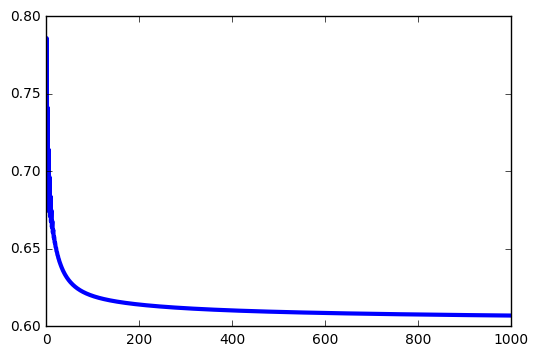

In [7]:
plt.plot(range(arrayJ.size), arrayJ, color='blue', linewidth=3)
plt.show()

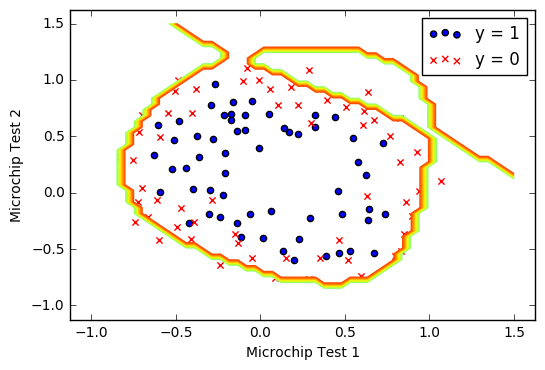

In [8]:
#Plot Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        mf = map_feature(np.array(u[i]), np.array(v[j]))
        # z[i, j] = mf.dot(np.array(theta))
        z[i,j] = 1 if logit(mf.dot(theta)) >= 0.5 else 0
        # z[i,j] = regr.predict(mf)

z = z.T
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
levels = np.arange(-1.5, 1.5, .1)
plt.contour(u, v, z, levels)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.show()